# What we can learn regarding the survival rates of different groups of people.


## Step 1: Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

#this adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

In [2]:
titanic = pd.read_csv('../titanic_lab/train.csv')

In [4]:
titanic = pd.read_csv('../titanic_lab/train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Step 2: Cleaning the data

In [21]:
#Create a bar chart showing how many missing values are in each column
# !pip install missingno
# import missingno
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 3: Feature extraction

In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Define Familycount
titanic["FamilyCount"] = titanic['Parch']+titanic['SibSp']

In [15]:
titanic["FamilyCount"].head()

0    1
1    1
2    0
3    1
4    0
Name: FamilyCount, dtype: int64

In [ ]:
#Reverends have a special title in their name. Create a column called 
#1 titanic["IsReverend"]: 1 if they're a preacher, 0 if they're not.

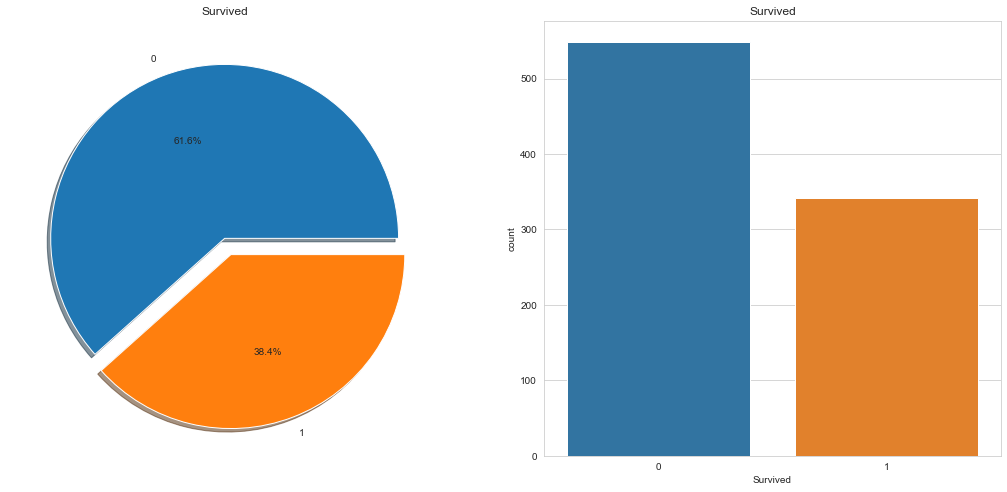

In [25]:
#What was the survival rate overall?
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [26]:
# 2Which gender fared the worst? What was their survival rate?
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


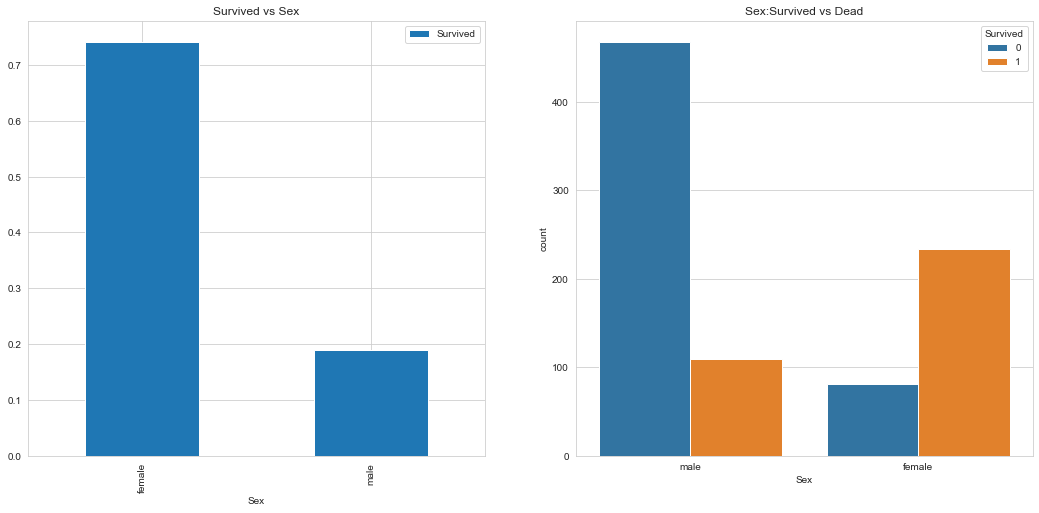

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [33]:
#3 What was the survival rate for each `Pclass`?
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True).style.background_gradient(cmap='Greens')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


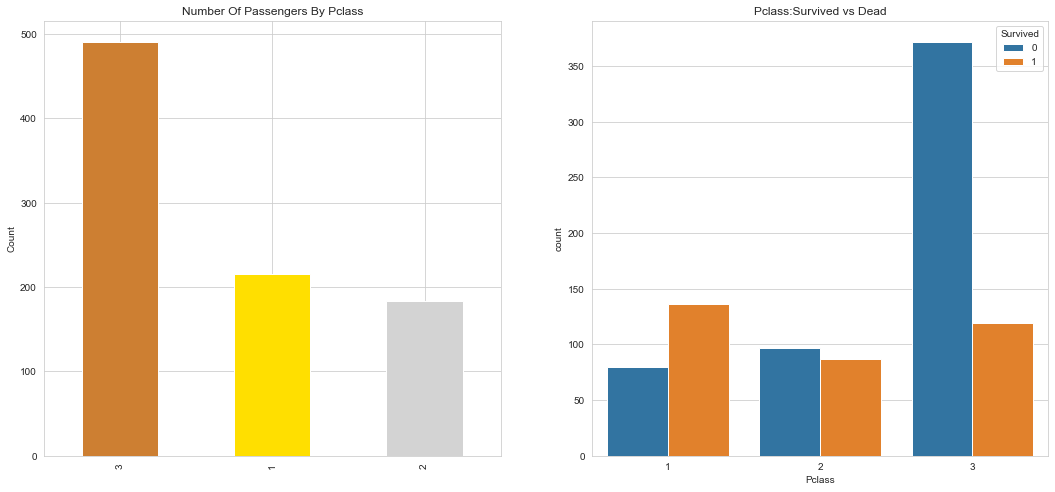

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [39]:
# 4Did any reverends survive? How many?
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='Greens')

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


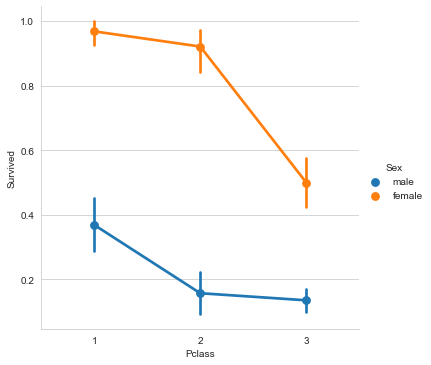

In [38]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic)
plt.show()

In [ ]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**


In [40]:
# 6. What is the survival rate for people whose `Age` is empty?
print('Oldest Passenger was of:',titanic['Age'].max(),'Years')
print('Youngest Passenger was of:',titanic['Age'].min(),'Years')
print('Average Age on the ship:',titanic['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


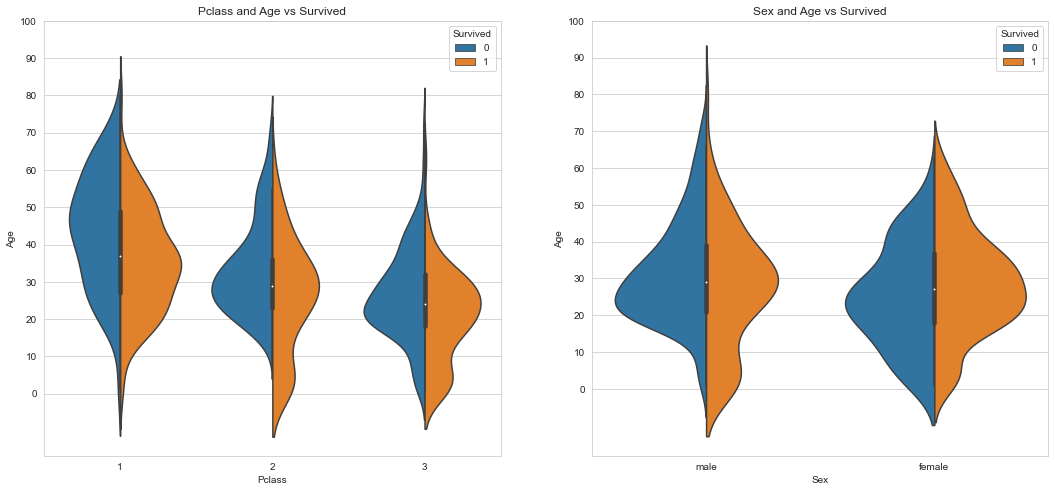

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=titanic,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [43]:
#7. What is the survival rate for each port of embarkation?
titanic['Initial']=0
for i in titanic:
    titanic['Initial']=titanic.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [45]:
pd.crosstab(titanic.Initial,titanic.Sex).T.style.background_gradient(cmap='Greens') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [46]:
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [47]:
#8 What is the survival rate for children (under 12) in each `Pclass`?
titanic.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [50]:
## Assigning the NaN Values with the Ceil values of the mean ages
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=46

In [51]:
titanic.Age.isnull().any() #So no null values left finally 

False

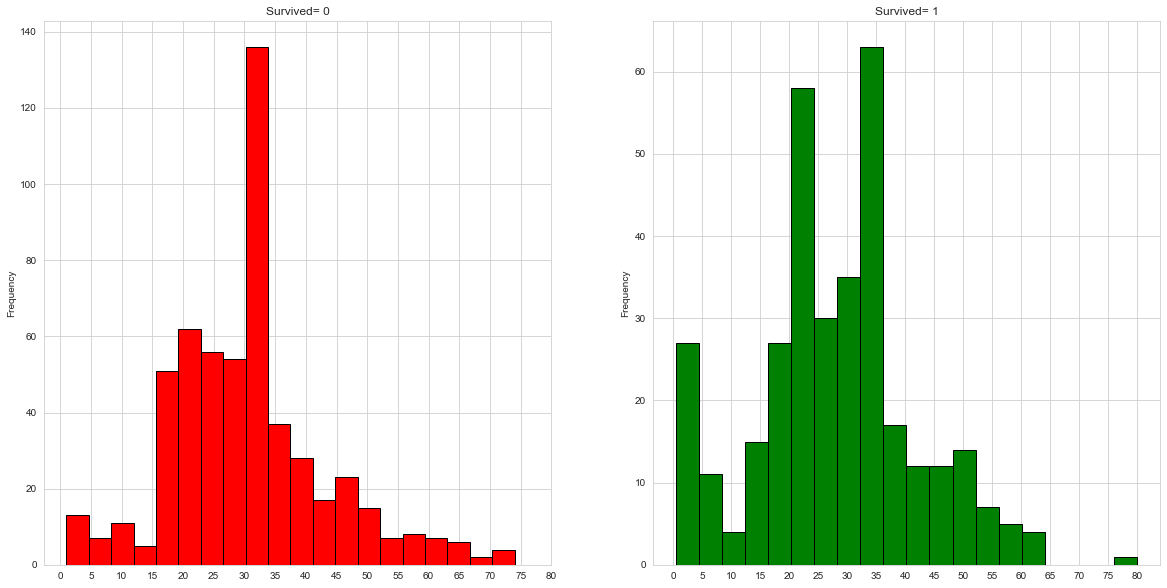

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


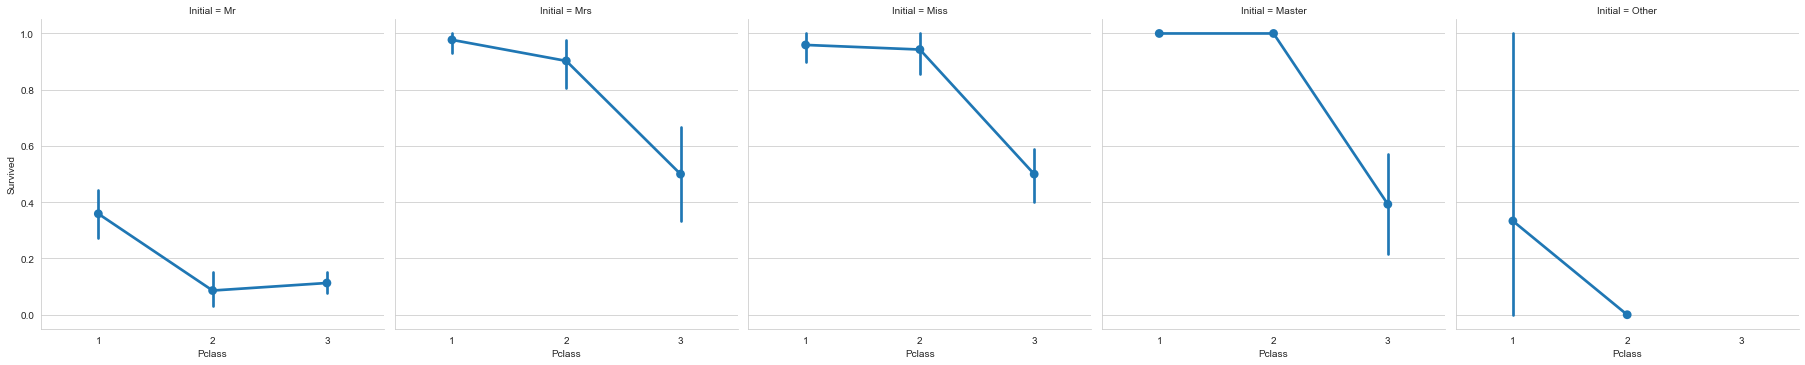

In [54]:
sns.factorplot('Pclass','Survived',col='Initial',data=titanic)
plt.show()

In [55]:

pd.crosstab([titanic.Embarked,titanic.Pclass],[titanic.Sex,titanic.Survived],margins=True).style.background_gradient(cmap='Greens')

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


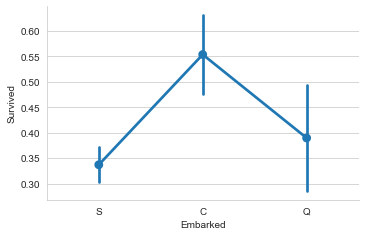

In [57]:
sns.factorplot('Embarked','Survived',data=titanic)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pornpanthongdee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

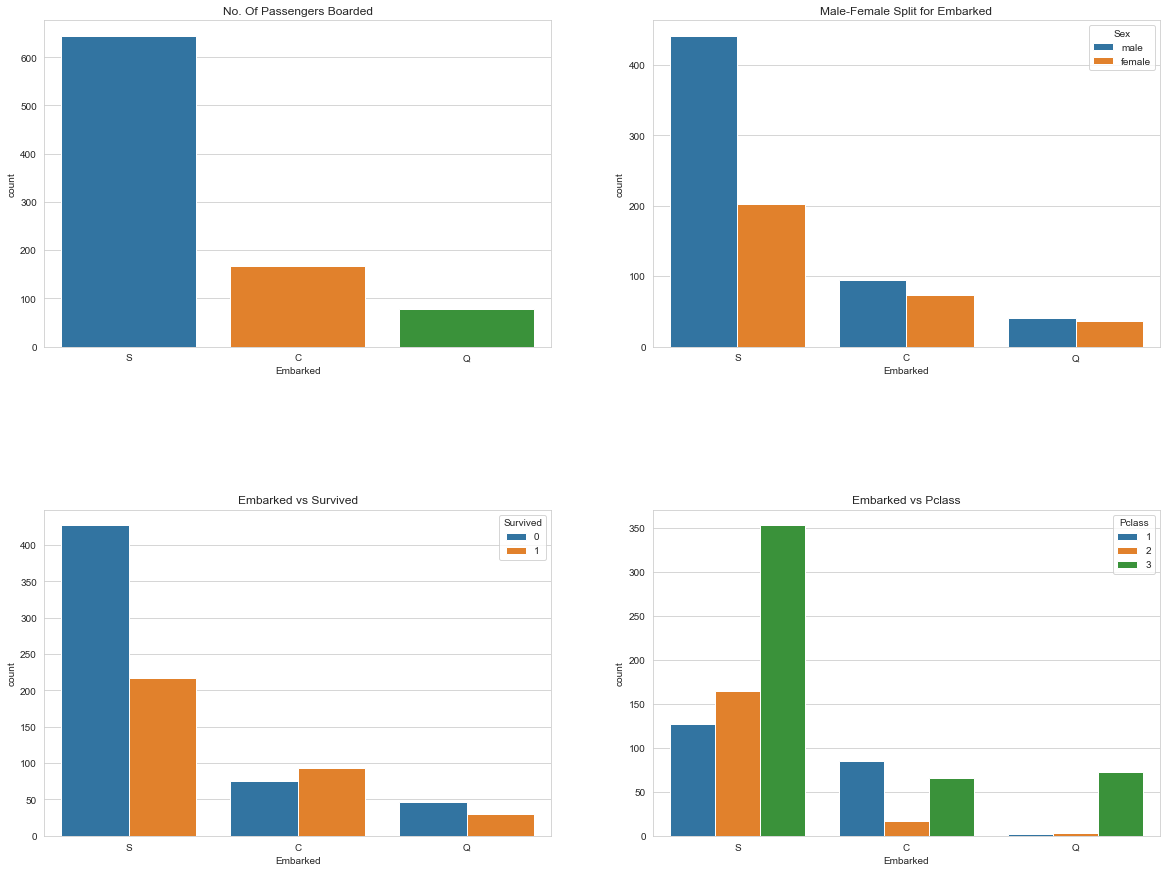

In [58]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=titanic,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=titanic,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=titanic,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=titanic,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
#9. Did the captain of the ship survive? Is he on the list?